In [1]:
# Python program to create
# Image Classifier using CNN

# Importing the required libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tflearn.layers.estimator import regression
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
import tflearn
import cv2
import os
import numpy as np
from random import shuffle
from tqdm import tqdm

'''Setting up the env'''

TRAIN_DIR = 'train'
TEST_DIR = 'test'
IMG_SIZE = 50
LR = 1e-3


'''Setting up the model which will help with tensorflow models'''
MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '6conv-basic')

'''Labelling the dataset'''


def label_img(img):
	word_label = img.split('.')[-3]
	# DIY One hot encoder
	if word_label == 'cat': return [1, 0]
	elif word_label == 'dog': return [0, 1]


'''Creating the training data'''


def create_train_data():
	# Creating an empty list where we should store the training data
	# after a little preprocessing of the data
	training_data = []

	# tqdm is only used for interactive loading
	# loading the training data
	for img in tqdm(os.listdir(TRAIN_DIR)):

		# labeling the images
		label = label_img(img)

		path = os.path.join(TRAIN_DIR, img)

		# loading the image from the path and then converting them into
		# grayscale for easier covnet prob
		img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

		# resizing the image for processing them in the covnet
		img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

		# final step-forming the training data list with numpy array of the images
		training_data.append([np.array(img), np.array(label)])

	# shuffling of the training data to preserve the random state of our data
	shuffle(training_data)

	# saving our trained data for further uses if required
	np.save('train_data.npy', training_data)
	return training_data


'''Processing the given test data'''
# Almost same as processing the training data but
# we dont have to label it.


def process_test_data():
	testing_data = []
	for img in tqdm(os.listdir(TEST_DIR)):
		path = os.path.join(TEST_DIR, img)
		img_num = img.split('.')[0]
		img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
		img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
		testing_data.append([np.array(img), img_num])

	shuffle(testing_data)
	np.save('test_data.npy', testing_data)
	return testing_data

C:\Users\Jatin-Lappy\AppData\Roaming\Python\Python310\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.11) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:
'''Running the training and the testing in the dataset for our model'''
# train_data = create_train_data()
# test_data = process_test_data()

train_data = np.load('train_data.npy', allow_pickle=True)
test_data = np.load('test_data.npy', allow_pickle=True)
'''Creating the neural network using tensorflow'''
# Importing the required libraries
ops.reset_default_graph()

# tf.reset_default_graph()
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR,
	loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

# Splitting the testing data and training data
train = train_data[:-700]
test = train_data[-700:]

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [3]:


'''Setting up the features and labels'''
# X-Features & Y-Labels

X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = [i[1] for i in train]
test_x = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_y = [i[1] for i in test]

print('Fitting the data into our model')
# epoch = 5 taken
model.fit({'input': X}, {'targets': Y}, n_epoch=5,
	validation_set=({'input': test_x}, {'targets': test_y}),
	snapshot_step=500, show_metric=True, run_id=MODEL_NAME)
model.save(MODEL_NAME)


Training Step: 1899  | total loss: 0.43575 | time: 56.096s
| Adam | epoch: 005 | loss: 0.43575 - acc: 0.8021 -- iter: 24256/24300
Training Step: 1900  | total loss: 0.43944 | time: 57.244s
| Adam | epoch: 005 | loss: 0.43944 - acc: 0.8016 | val_loss: 0.45522 - val_acc: 0.7571 -- iter: 24300/24300
--
INFO:tensorflow:C:\Users\Jatin-Lappy\Desktop\Image Processing (DS project sem 7)\geeks for geeks\Image-Classifier-ConvNet-in-Cats-Dog-dataset\dogsvscats-0.001-6conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.


Testing the data


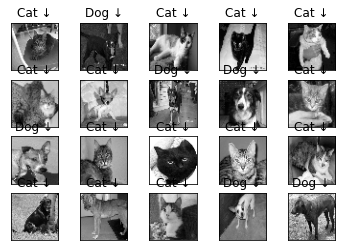

In [26]:
print('Testing the data')
# if you need to create the data:
# test_data = process_test_data()
# if you already have some saved:
test_data = np.load('test_data.npy', allow_pickle=True)

fig = plt.figure()

for num, data in enumerate(test_data[:20]):
	# cat: [1, 0]
	# dog: [0, 1]

	img_num = data[1]
	img_data = data[0]

	y = fig.add_subplot(4, 5, num + 1)
	orig = img_data
    
	data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)

    

	# model_out = model.predict([data])[0]

	model_out = model.predict([data])[0]
# 	print(model_out)
    
	
	if np.argmax(model_out) == 1: str_label ='Dog ↓'
	else: str_label ='Cat ↓'
		
	y.imshow(orig, cmap ='gray')
	plt.title(str_label)
	y.axes.get_xaxis().set_visible(False)
	y.axes.get_yaxis().set_visible(False)

plt.show()
